In [2]:
import tensorflow as tf

In [2]:
from glob import glob

In [3]:
train_path = 'train_data/train_data/'
valid_path = 'validation_data_V2/validation_data_V2/'

In [4]:
image_files = glob(train_path + '/*/*.jp*g')
valid_image_files = glob(valid_path + '/*/*.jp*g')

In [5]:
folders = glob(train_path+'/*')

In [6]:
gen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=20,
                                                      shear_range=0.1,
                                                      zoom_range=0.2,
                                                      horizontal_flip=True,
                                                      vertical_flip=True,
                                                      preprocessing_function=tf.keras.applications.vgg16.preprocess_input)

train_generator = gen.flow_from_directory(train_path,
                                          target_size=[100,100],
                                          shuffle=True,
                                          batch_size=32)

valid_generator = gen.flow_from_directory(valid_path,
                                          target_size=[100,100],
                                          shuffle=True,
                                          batch_size=32)


Found 5361 images belonging to 7 classes.
Found 2660 images belonging to 7 classes.


In [7]:
vgg = tf.keras.applications.vgg16.VGG16(input_shape=[100,100,3],
                                        weights="imagenet",
                                        include_top=False)


#To use the existing weights and disable training on VGG object.
# Ensure all weights are immutable

for layer in vgg.layers:
  layer.trainable = False

In [8]:
#Flatten
flatten = tf.keras.layers.Flatten()
#FC layer
finalLayer = tf.keras.layers.Dense(7,activation="softmax")

In [9]:
model = tf.keras.models.Sequential([
                                    vgg,
                                    flatten,
                                    finalLayer
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 3, 3, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 7)                 32263     
Total params: 14,746,951
Trainable params: 32,263
Non-trainable params: 14,714,688
_________________________________________________________________


In [11]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam', #tf.keras.optimizers.Adam(learning_rate=0.0001)
              metrics=['accuracy'])

In [12]:
#Fit/Training
batch_size=32
history = model.fit(train_generator,
                    validation_data=valid_generator,
                    epochs=5,
                    steps_per_epoch=len(train_generator.filenames) // batch_size,
                    validation_steps=len(valid_generator.filenames) // batch_size,
                    use_multiprocessing=False)

Epoch 1/5
167/167 [==============================] - 904s 5s/step - loss: 9.0575 - accuracy: 0.5004 - val_loss: 33.2878 - val_accuracy: 0.2056
Epoch 2/5
167/167 [==============================] - 889s 5s/step - loss: 4.8649 - accuracy: 0.6778 - val_loss: 38.9984 - val_accuracy: 0.1886
Epoch 3/5
167/167 [==============================] - 833s 5s/step - loss: 4.9653 - accuracy: 0.6734 - val_loss: 41.8299 - val_accuracy: 0.1973
Epoch 4/5
167/167 [==============================] - 839s 5s/step - loss: 4.7161 - accuracy: 0.6910 - val_loss: 43.6139 - val_accuracy: 0.2203
Epoch 5/5
167/167 [==============================] - 908s 5s/step - loss: 4.4438 - accuracy: 0.7083 - val_loss: 47.8130 - val_accuracy: 0.2078


In [13]:
#Step1: Use Image Generator

gen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=20,
                                                      shear_range=0.1,
                                                      zoom_range=0.2,
                                                      horizontal_flip=True,
                                                      vertical_flip=True,
                                                      preprocessing_function=tf.keras.applications.inception_v3.preprocess_input)

train_generator = gen.flow_from_directory(train_path,
                                          target_size=[100,100],
                                          shuffle=True,
                                          batch_size=32)

valid_generator = gen.flow_from_directory(valid_path,
                                          target_size=[100,100],
                                          shuffle=True,
                                          batch_size=32)

Found 5361 images belonging to 7 classes.
Found 2660 images belonging to 7 classes.


In [14]:
inception = tf.keras.applications.inception_v3.InceptionV3(input_shape=[100,100,3],
                                        weights="imagenet",
                                        include_top=False)


87916544/87910968 [==============================] - 23s 0us/step


In [15]:

for layer in inception.layers:
  layer.trainable = False

#Create our FC layer as per our spec
#Flatten
flatten = tf.keras.layers.Flatten()
#FC layer
finalLayer = tf.keras.layers.Dense(7,activation="softmax")

#Append Inception and FC and create a final model
model1 = tf.keras.models.Sequential([
                                    inception,
                                    flatten,
                                    finalLayer
])

In [16]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 1, 1, 2048)        21802784  
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 14343     
Total params: 21,817,127
Trainable params: 14,343
Non-trainable params: 21,802,784
_________________________________________________________________


In [17]:
#Compile Model
model1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
#Fit/Training
batch_size=32
history = model1.fit(train_generator,
                    validation_data=valid_generator,
                    epochs=5,
                    steps_per_epoch=len(train_generator.filenames) // batch_size,
                    validation_steps=len(valid_generator.filenames) // batch_size,
                    use_multiprocessing=False)

Epoch 1/5
167/167 [==============================] - 246s 1s/step - loss: 1.8021 - accuracy: 0.3950 - val_loss: 3.6867 - val_accuracy: 0.2071
Epoch 2/5
167/167 [==============================] - 211s 1s/step - loss: 1.1286 - accuracy: 0.5896 - val_loss: 3.9934 - val_accuracy: 0.1924
Epoch 3/5
167/167 [==============================] - 216s 1s/step - loss: 1.0784 - accuracy: 0.5967 - val_loss: 4.0378 - val_accuracy: 0.1860
Epoch 4/5
167/167 [==============================] - 217s 1s/step - loss: 1.0526 - accuracy: 0.6184 - val_loss: 4.2706 - val_accuracy: 0.2150
Epoch 5/5
167/167 [==============================] - 217s 1s/step - loss: 1.0064 - accuracy: 0.6258 - val_loss: 4.3117 - val_accuracy: 0.2116


In [18]:
#Resnet50
#Step1: Use Image Generator

gen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=20,
                                                      shear_range=0.1,
                                                      zoom_range=0.2,
                                                      horizontal_flip=True,
                                                      vertical_flip=True,
                                                      preprocessing_function=tf.keras.applications.resnet50.preprocess_input)

train_generator = gen.flow_from_directory(train_path,
                                          target_size=[100,100],
                                          shuffle=True,
                                          batch_size=32)

valid_generator = gen.flow_from_directory(valid_path,
                                          target_size=[100,100],
                                          shuffle=True,
                                          batch_size=32)

Found 5361 images belonging to 7 classes.
Found 2660 images belonging to 7 classes.


In [19]:
resnet = tf.keras.applications.resnet50.ResNet50(input_shape=[100,100,3],
                                        weights="imagenet",
                                        include_top=False)

for layer in resnet.layers:
  layer.trainable = False

#Create our FC layer as per our spec
#Flatten
flatten = tf.keras.layers.Flatten()
#FC layer
finalLayer = tf.keras.layers.Dense(7,activation="softmax")

#Append Inception and FC and create a final model
model = tf.keras.models.Sequential([
                                    resnet,
                                    flatten,
                                    finalLayer
])
#Compile Model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
#Fit/Training
batch_size=32
history = model.fit(train_generator,
                    validation_data=valid_generator,
                    epochs=5,
                    steps_per_epoch=len(train_generator.filenames) // batch_size,
                    validation_steps=len(valid_generator.filenames) // batch_size,
                    use_multiprocessing=False)

94773248/94765736 [==============================] - 17s 0us/step
Epoch 1/5
167/167 [==============================] - 436s 3s/step - loss: 4.7114 - accuracy: 0.5528 - val_loss: 27.0364 - val_accuracy: 0.1965
Epoch 2/5
167/167 [==============================] - 419s 3s/step - loss: 3.5495 - accuracy: 0.6675 - val_loss: 31.2088 - val_accuracy: 0.2142
Epoch 3/5
167/167 [==============================] - 438s 3s/step - loss: 3.3289 - accuracy: 0.7151 - val_loss: 34.1929 - val_accuracy: 0.2101
Epoch 4/5
167/167 [==============================] - 451s 3s/step - loss: 3.2489 - accuracy: 0.7387 - val_loss: 37.0206 - val_accuracy: 0.2131
Epoch 5/5
167/167 [==============================] - 401s 2s/step - loss: 3.0457 - accuracy: 0.7476 - val_loss: 43.5633 - val_accuracy: 0.2300


In [35]:
#Use Image Generators
#1. Initialize
#For Training Data
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale= 1.0/255.)

#For Validation Data
validation_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale= 1.0/255.)

In [36]:
#Pass set of images to the generator to generate compatible images for CNN
trainImageData = train_generator.flow_from_directory('train_data/train_data/',
                                                     batch_size=32,
                                                     class_mode='binary',
                                                     target_size=(64,64))

validationImageData = train_generator.flow_from_directory('validation_data_V2/validation_data_V2/',
                                                          batch_size=32,
                                                     class_mode='binary',
                                                     target_size=(64,64))


Found 5361 images belonging to 7 classes.
Found 2660 images belonging to 7 classes.


In [37]:
#Architect your CNN Model

model_cnn = tf.keras.models.Sequential()

#Step1: Create  First Convolution Layer
# Conv1D --- Sound/Mp3/Text
# Conv2D --- Image/Image Set
# Conv3D --- Movies/Mp4

#Create Convolve Layer
# Conv2D(No_Of_filters,Size_of_Filter, input_shape)
# Suggestions/Best Practices by Prashant Nair
# 1. Filters ----> Choose Boolean Algebra Compatible Values like 1,2,4,8,16,32,64,128,256,512
# 2. Size_of_Filter ---> If Data Size below 10GB --> (3,3) If betn 10GB - 100G --> (4,4) , Above 100G --> (5,5)
# 3. Input Shape ---> Suggested go 64,64 ; 128,128 ; 256,256 ; 512,512

model_cnn.add(tf.keras.layers.Conv2D(32, (3,3) , input_shape=(64,64,3) ,activation='relu', padding='same', strides=(1,1)))
model_cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
#model.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2)))

#Step2: Create  Second Convolution Layer
model_cnn.add(tf.keras.layers.Conv2D(16, (3,3) , input_shape=(64,64,3) ,activation='relu', padding='same', strides=(1,1)))
model_cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

#Step3: Flatten
model_cnn.add(tf.keras.layers.Flatten())

#Step4: FC Layer/ANN
model_cnn.add(tf.keras.layers.Dense(units=512, activation='relu'))
model_cnn.add(tf.keras.layers.Dense(units=256, activation='relu'))

model_cnn.add(tf.keras.layers.Dense(units=7, activation='softmax'))



In [38]:
model_cnn.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_96 (Conv2D)           (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_97 (Conv2D)           (None, 32, 32, 16)        4624      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               2097664   
_________________________________________________________________
dense_7 (Dense)              (None, 256)              

In [41]:
#Compile

model_cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#The error arose because 'categorical_crossentropy' works on one-hot encoded target, 
#while 'sparse_categorical_crossentropy' works on integer target.

In [43]:
#Fit
history = model_cnn.fit(x = trainImageData,
                    validation_data=validationImageData,
                    epochs = 20,
                    steps_per_epoch= len(trainImageData.filenames)/trainImageData.batch_size, #No_Of_Images/batch_size)
                    validation_steps =len(validationImageData.filenames)/validationImageData.batch_size )

Epoch 1/20
167/167 [==============================] - 145s 868ms/step - loss: 1.5528 - accuracy: 0.3578 - val_loss: 2.3484 - val_accuracy: 0.2090
Epoch 2/20
167/167 [==============================] - 68s 407ms/step - loss: 1.3359 - accuracy: 0.4762 - val_loss: 2.4652 - val_accuracy: 0.2316
Epoch 3/20
167/167 [==============================] - 69s 411ms/step - loss: 1.1651 - accuracy: 0.5443 - val_loss: 2.9683 - val_accuracy: 0.2229
Epoch 4/20
167/167 [==============================] - 68s 406ms/step - loss: 0.9757 - accuracy: 0.6260 - val_loss: 3.6569 - val_accuracy: 0.2274
Epoch 5/20
167/167 [==============================] - 68s 407ms/step - loss: 0.7405 - accuracy: 0.7267 - val_loss: 4.7098 - val_accuracy: 0.2267
Epoch 6/20
167/167 [==============================] - 68s 405ms/step - loss: 0.4842 - accuracy: 0.8256 - val_loss: 6.1230 - val_accuracy: 0.2188
Epoch 7/20
167/167 [==============================] - 68s 405ms/step - loss: 0.2940 - accuracy: 0.9019 - val_loss: 8.1054 - val_a

{'Gasoline Can': 0, 'Hammer': 1, 'Pliers': 2, 'Rope': 3, 'Screw Driver': 4, 'Tool box': 5, 'Wrench': 6}


array([2], dtype=int64)

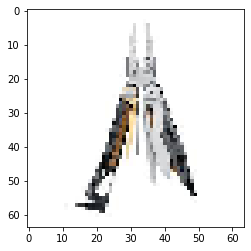

In [55]:
#Step1: Load the Image and Ensure the size of image is equal to the image size used during training of the model.

img = tf.keras.preprocessing.image.load_img('test_data/test_data/000384.jpg' , target_size=(64,64))

import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(img)

imgArray = tf.keras.preprocessing.image.img_to_array(img)

imgArray.shape

# Step3: Making Image Array compatible with Training Model 
import numpy as np

compatibleArray = np.expand_dims(imgArray, axis=0)

compatibleArray.shape

print(trainImageData.class_indices)


model_cnn.predict_classes(compatibleArray)x

{'Gasoline Can': 0, 'Hammer': 1, 'Pliers': 2, 'Rope': 3, 'Screw Driver': 4, 'Tool box': 5, 'Wrench': 6}


array([0], dtype=int64)

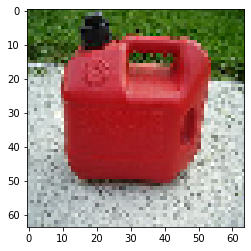

In [58]:
#Step1: Load the Image and Ensure the size of image is equal to the image size used during training of the model.

img = tf.keras.preprocessing.image.load_img('test_data/gasoline.jpg' , target_size=(64,64))

import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(img)

imgArray = tf.keras.preprocessing.image.img_to_array(img)

imgArray.shape

# Step3: Making Image Array compatible with Training Model 
import numpy as np

compatibleArray = np.expand_dims(imgArray, axis=0)

compatibleArray.shape

print(trainImageData.class_indices)


model_cnn.predict_classes(compatibleArray)

{'Gasoline Can': 0, 'Hammer': 1, 'Pliers': 2, 'Rope': 3, 'Screw Driver': 4, 'Tool box': 5, 'Wrench': 6}


array([4], dtype=int64)

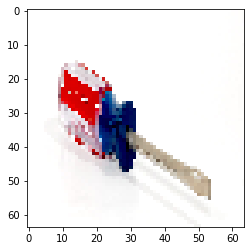

In [59]:
#Step1: Load the Image and Ensure the size of image is equal to the image size used during training of the model.

img = tf.keras.preprocessing.image.load_img('test_data/screw.jpg' , target_size=(64,64))

import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(img)

imgArray = tf.keras.preprocessing.image.img_to_array(img)

imgArray.shape

# Step3: Making Image Array compatible with Training Model 
import numpy as np

compatibleArray = np.expand_dims(imgArray, axis=0)

compatibleArray.shape

print(trainImageData.class_indices)


model_cnn.predict_classes(compatibleArray)

In [61]:
model_cnn.save('Model/')

INFO:tensorflow:Assets written to: Model/assets


In [62]:
model.save('Model Transfer/')

INFO:tensorflow:Assets written to: Model Transfer/assets


In [1]:
from tensorflow.keras.models import load_model

# give the path to model directory to load the model
loaded_model = load_model('Model/')

# predict function to predict the probabilities for each class 0-9
#loaded_model.predict(test_images[0:1])



(1, 64, 64, 3)

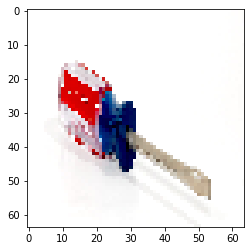

In [5]:
img = tf.keras.preprocessing.image.load_img('test_data/screw.jpg' , target_size=(64,64))

import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(img)

imgArray = tf.keras.preprocessing.image.img_to_array(img)

imgArray.shape

# Step3: Making Image Array compatible with Training Model 
import numpy as np

compatibleArray = np.expand_dims(imgArray, axis=0)

compatibleArray.shape



In [4]:
# predict_classes to get the class with highest probability 
#print(trainImageData.class_indices)
loaded_model.predict_classes(compatibleArray)

C:\Users\Saransh\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([4], dtype=int64)